![](https://hipsters.jobs/files/pictures/Logo_AlurabyCaelum.png)

### #QUARENTENADADOS

### https://www.alura.com.br/quarentenadados/aula01-sua-primeira-analise-de-dados?utm_campaign=alura_quarentenadados_-_1_aula&utm_medium=email&utm_source=RD+Station

### Este primeiro trabalho consiste em ler dados do MovieLens e fazer algumas análises nas avaliações dos filmes

O MovieLens é uma comunidade virtual que recomenda filmes para que seus usuários assistam, com base em suas preferências de filmes usando filtragem colaborativa de classificação dos filmes dos membros e críticas de filmes.

https://movielens.org/

![](https://www.saashub.com/images/app/service_logos/8/f181cf663f5c/large.png)

### Importando as bibliotecas a serem usadas

A primeira coisa a ser feita é a importação das biliotecas. Mesmo que sejam usadas mais adiante, é bom que este processo seja feito logo no início, de modo a manter a estrutura do notebook orgnaizada.

![](https://thumbs.gfycat.com/IdleCostlyBaiji-size_restricted.gif)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

### Importando a base de dados do MovieLens

Aqui nós iremos importar a nossa base de dados.
Além disso, alteraremos os nomes da coluna, tornando a identificação mais intuitiva.

In [2]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

In [3]:
filmes.columns = ["filmeId", "titulos", "generos"]

In [4]:
filmes.head()

,filmeId,titulos,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Importando a base de dados das avaliações dos filmes

In [5]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

In [6]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [7]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931



### Alguns testes que podemos fazer na base de dados baixada

Abaixo mostramos algumas coisas que podem ser feitas com a nossa base de dados. Estas manipulações ajudam a analisar as informações que estamos tratando, como identificar médias, verificar número de linhas e valores máximo e mínimo, dentre outros.

In [8]:
#Tamanho da base (número de linhas)

len(avaliacoes)

100836

In [9]:
#Lendo a documentação do objeti (docstring)

?avaliacoes

In [10]:
#Número de linhas e número de colunas (features)

avaliacoes.shape 

(100836, 4)

In [11]:
#Nomes das colunas

avaliacoes.columns 

Index(['usuarioId', 'filmeId', 'nota', 'momento'], dtype='object')

In [12]:
#Descrição da base de dados "avaliacoes"

avaliacoes.describe() 

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [13]:
#Filtrar as linhas cujos valores de "filmeId" sejam iguais a 1

avaliacoes.query("filmeId==1").head(5)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


### Filmes agrupados por notas

In [14]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()

In [15]:
notas_medias_por_filme.head(5)

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

### Unindo informações dos dois repositórios que carregamos

Aqui nós iremos inserir a coluna de "notas" à tabela "filmes" através do join, tendo como coluna comum "filmeId"

In [16]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")

In [17]:
filmes_com_media.head()

,filmeId,titulos,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [18]:
#Ordenando os filmes pelo maior valor da nota

filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulos,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


### Alguns gráficos

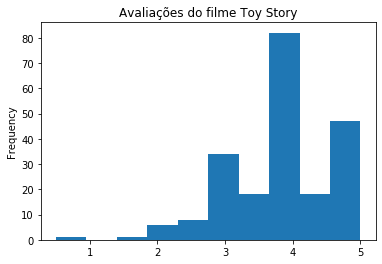

In [19]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

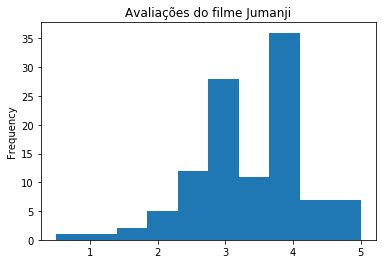

In [20]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Jumanji")
plt.show()

### Desafio 1 do Paulo Silveira
O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [21]:
filmes_com_media.sort_values("nota", ascending=False)

,filmeId,titulos,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [22]:
filmes_com_media["nota"].isnull().sum()

18

In [23]:
print(filmes_sem_avaliacao)

NameError: name 'filmes_sem_avaliacao' is not defined

### Desafio 2 do Guilherme Silveira

Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.


In [23]:
filmes_com_media = filmes_com_media.rename(columns={'nota':'notas'})

In [24]:
filmes_com_media.head(5)

,filmeId,titulos,generos,notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


### Desafio 3 do Guilherme Silveira

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.



In [36]:
avaliacoes.head(5)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Desafio 4 do Thiago Gonçalves

Arredondar as médias (coluna de nota média) para duas casas decimais.



In [26]:
filmes_com_media['notas'] = filmes_com_media.notas.round(2)

In [27]:
filmes_com_media.head(5)

,filmeId,titulos,generos,notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


### Desafio 5 do Allan Spadini

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)



In [32]:
filmes_com_media['generos'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

### Desafio 6 da Thais André

Contar o número de aparições de cada genero.



### Desafio 7 do Guilherme Silveira

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.